In [1]:
from codecarbon import EmissionsTracker
try:
    tracker.stop()  # Intenta detener cualquier instancia previa de codecarbon
except:
    pass  # Ignora el error si no hay ninguna instancia activa
# Iniciar el medidor
tracker = EmissionsTracker()
tracker.start()

[codecarbon INFO @ 17:45:32] [setup] RAM Tracking...
[codecarbon INFO @ 17:45:32] [setup] CPU Tracking...
[codecarbon WARNING @ 17:45:35] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 17:45:36] CPU Model on constant consumption mode: Apple M1
[codecarbon INFO @ 17:45:36] [setup] GPU Tracking...
[codecarbon INFO @ 17:45:36] No GPU found.
[codecarbon INFO @ 17:45:36] >>> Tracker's metadata:
[codecarbon INFO @ 17:45:36]   Platform system: macOS-10.16-x86_64-i386-64bit
[codecarbon INFO @ 17:45:36]   Python version: 3.9.12
[codecarbon INFO @ 17:45:36]   CodeCarbon version: 2.8.3
[codecarbon INFO @ 17:45:36]   Available RAM : 8.000 GB
[codecarbon INFO @ 17:45:36]   CPU count: 8
[codecarbon INFO @ 17:45:36]   CPU model: Apple M1
[codecarbon INFO @ 17:45:36]   GPU count: None
[codecarbon INFO @ 17:45:36]   GPU model: None
[codecarbon INFO @ 17:45:39] Saving emissions data to

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhoomikavalani/donateacrycorpusfeaturesdataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/lucia/.cache/kagglehub/datasets/bhoomikavalani/donateacrycorpusfeaturesdataset/versions/2


In [4]:
data = '/Users/lucia/.cache/kagglehub/datasets/bhoomikavalani/donateacrycorpusfeaturesdataset/versions/2/donateacry-corpus_features_final.csv'

df = pd.read_csv(data)

In [5]:
import re

def extraer_info_mejorada(ruta):
    # Extrae con regex el patrón típico del final del nombre del archivo
    match = re.search(r'-([\d.]+)-(m|f)-(\d+)-', ruta)
    if match:
        # match.groups() devuelve (edad_raw, genero, edad_clasificada)
        edad_raw, genero, edad = match.groups()
        return genero, edad
    else:
        return None, None  # si no encuentra patrón, deja como None

df[['Genero', 'Edad_Codigo']] = df['Cry_Audio_File'].apply(lambda x: pd.Series(extraer_info_mejorada(x)))

df['Genero'] = df['Genero'].map({'m': 0, 'f': 1})

edad_map = {
    '04': 1,
    '48': 2,
    '26': 3,
    '72': 4,
    '22': 5
}

df['Edad'] = df['Edad_Codigo'].map(edad_map)

df.drop(columns=['Cry_Audio_File', 'Edad_Codigo'], inplace=True)

In [6]:
df.head()

,Cry_Reason,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,delMFCCs13,...,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13,Genero,Edad
0,0,0.028202,0.011050,0.098990,0.102389,1264.335599,519.101121,26.821807,-48.271230,0.082188,...,-30.088297,-18.766724,8.679635,-2.352078,-7.746244,-3.096202,-4.715273,-3.918095,0,3
1,0,0.021071,0.006951,0.115383,0.050369,1268.608766,575.457549,25.881312,-49.861237,0.101375,...,-25.927773,-4.430356,-4.619092,-22.430754,-4.303273,0.172620,-11.258208,-3.497785,1,3
2,0,0.029967,0.010904,0.116663,0.100042,1546.578200,699.626649,26.594715,-49.541706,0.023605,...,-26.675592,3.294869,7.788799,-21.903955,-5.744544,4.150358,-11.718720,-6.870083,0,1
3,0,0.027163,0.010520,0.085081,0.140766,1089.415328,668.895951,25.608310,-44.275997,-0.016075,...,-29.814095,-14.937744,-11.162116,-21.503994,-7.501309,-7.856627,-15.119538,-3.970483,0,4
4,0,0.016663,0.006577,0.067108,0.057629,1017.610932,700.682410,28.196010,-51.325264,0.021112,...,-34.050182,-9.673841,-11.780775,-24.962975,-7.697065,-9.014325,-15.366213,-2.237437,0,4


In [7]:
col_names = df.columns

col_names

Index(['Cry_Reason', 'Amplitude_Envelope_Mean', 'RMS_Mean', 'ZCR_Mean',
       'STFT_Mean', 'SC_Mean', 'SBAN_Mean', 'SCON_Mean', 'MFCCs13Mean',
       'delMFCCs13', 'del2MFCCs13', 'MelSpec', 'MFCCs20', 'MFCCs1', 'MFCCs2',
       'MFCCs3', 'MFCCs4', 'MFCCs5', 'MFCCs6', 'MFCCs7', 'MFCCs8', 'MFCCs9',
       'MFCCs10', 'MFCCs11', 'MFCCs12', 'MFCCs13', 'Genero', 'Edad'],
      dtype='object')

In [8]:
X = df.drop(['Cry_Reason'], axis=1)

y = df['Cry_Reason']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
cols = X_train.columns

In [11]:
#20% test, 80% training
X_train.shape, X_test.shape

((365, 27), (92, 27))

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [13]:
X_train = pd.DataFrame(X_train, columns=[cols])


In [14]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [15]:
from sklearn.tree import DecisionTreeClassifier

CRITERIO DE GINI

In [16]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [17]:
y_pred_gini = clf_gini.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8261


In [19]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,

In [20]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8438


In [21]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8438
Test set score: 0.8261


[Text(0.5, 0.875, 'x[19] <= 0.603\ngini = 0.302\nsamples = 365\nvalue = [11, 7, 26, 303, 18]'),
 Text(0.25, 0.625, 'x[3] <= 0.269\ngini = 0.231\nsamples = 286\nvalue = [7, 4, 14, 250, 11]'),
 Text(0.125, 0.375, 'x[10] <= 0.745\ngini = 0.217\nsamples = 281\nvalue = [7, 3, 12, 248, 11]'),
 Text(0.0625, 0.125, 'gini = 0.313\nsamples = 158\nvalue = [6, 2, 10, 130, 10]'),
 Text(0.1875, 0.125, 'gini = 0.079\nsamples = 123\nvalue = [1, 1, 2, 118, 1]'),
 Text(0.375, 0.375, 'x[2] <= 0.584\ngini = 0.64\nsamples = 5\nvalue = [0, 1, 2, 2, 0]'),
 Text(0.3125, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0]'),
 Text(0.75, 0.625, 'x[22] <= 0.386\ngini = 0.515\nsamples = 79\nvalue = [4, 3, 12, 53, 7]'),
 Text(0.625, 0.375, 'x[16] <= 0.542\ngini = 0.275\nsamples = 39\nvalue = [1, 0, 3, 33, 2]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 0, 25, 0]'),
 Text(0.6875, 0.125, 'gini = 0.602\nsamples = 14\

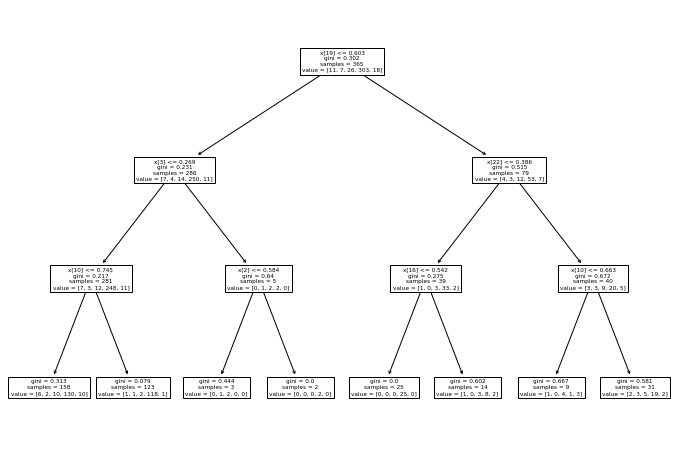

In [22]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

CRITERIO DE ENTROPÍA

In [23]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [24]:
y_pred_en = clf_en.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8261


In [26]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [27]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8329


In [28]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8329
Test set score: 0.8261


[Text(0.5, 0.875, 'x[7] <= 0.676\nentropy = 0.97\nsamples = 365\nvalue = [11, 7, 26, 303, 18]'),
 Text(0.25, 0.625, 'x[24] <= 0.42\nentropy = 0.988\nsamples = 240\nvalue = [9, 2, 14, 197, 18]'),
 Text(0.125, 0.375, 'x[6] <= 0.524\nentropy = 1.177\nsamples = 142\nvalue = [9, 1, 14, 109, 9]'),
 Text(0.0625, 0.125, 'entropy = 1.015\nsamples = 31\nvalue = [0, 1, 8, 22, 0]'),
 Text(0.1875, 0.125, 'entropy = 1.091\nsamples = 111\nvalue = [9, 0, 6, 87, 9]'),
 Text(0.375, 0.375, 'x[15] <= 0.534\nentropy = 0.523\nsamples = 98\nvalue = [0, 1, 0, 88, 9]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 0, 40, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.744\nsamples = 58\nvalue = [0, 1, 0, 48, 9]'),
 Text(0.75, 0.625, 'x[15] <= 0.508\nentropy = 0.807\nsamples = 125\nvalue = [2, 5, 12, 106, 0]'),
 Text(0.625, 0.375, 'x[11] <= 0.797\nentropy = 1.012\nsamples = 34\nvalue = [1, 0, 9, 24, 0]'),
 Text(0.5625, 0.125, 'entropy = 0.469\nsamples = 20\nvalue = [0, 0, 2, 18, 0]'),
 Text(0.6875,

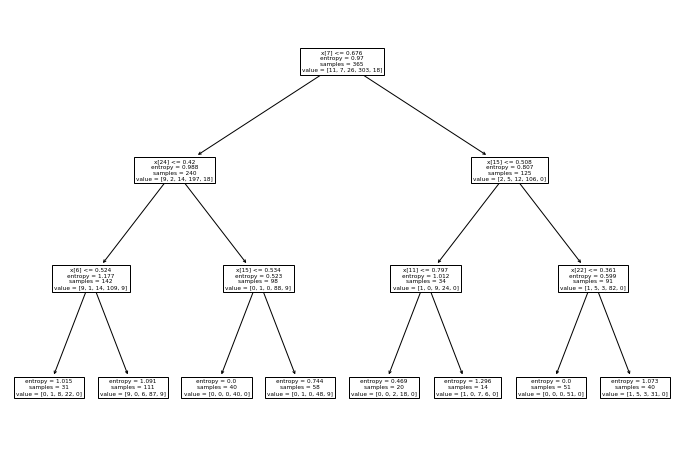

In [29]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred_en)

# Calcular la accuracy manualmente
accuracy = np.trace(cm) / np.sum(cm)
print("Accuracy (manual calculation):", accuracy)

# Calcular la accuracy con sklearn (más general para cualquier número de clases)
accuracy_sklearn = accuracy_score(y_test, y_pred_en)
print("Accuracy (sklearn):", accuracy_sklearn)

Accuracy (manual calculation): 0.8260869565217391
Accuracy (sklearn): 0.8260869565217391


In [31]:
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[ 0  0  0  5  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  3 76  0]
 [ 0  0  1  5  0]]


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.86      0.96      0.91        79
           4       0.00      0.00      0.00         6

    accuracy                           0.83        92
   macro avg       0.17      0.19      0.18        92
weighted avg       0.74      0.83      0.78        92



/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Comparación con Gini:

Gini tiene una mejor precisión en el conjunto de entrenamiento (0.8438 vs. 0.8329).

Ambos tienen exactamente el mismo rendimiento en el conjunto de prueba (0.8261).

¿Con cuál quedarte?

Gini tiene un leve mejor rendimiento en el entrenamiento, lo que sugiere que el árbol aprendido con este criterio logra un mejor ajuste.

Como el test score es idéntico en ambos casos, la generalización del modelo es la misma.

En general, si no hay una gran diferencia, Gini suele ser preferido porque es más rápido computacionalmente.

🔹 Recomendación: Quédate con Gini, ya que tiene una ligera ventaja en el entrenamiento sin afectar la generalización.

In [33]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred_gini)
sensibilidad = recall_score(y_test, y_pred_gini, average='weighted')  # Sensibilidad (recall)
f1 = f1_score(y_test, y_pred_gini, average='weighted')  # F1-score

# AUC solo es válido para problemas binarios; para múltiples clases, se usa 'ovr' (one vs rest)
try:
    auc = roc_auc_score(y_test, clf_gini.predict_proba(X_test), multi_class='ovr', average='weighted')
except ValueError:
    auc = "No se puede calcular AUC para clasificación no probabilística o datos incompatibles."

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensibilidad (Recall): {sensibilidad:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc}")

Accuracy: 0.8261
Sensibilidad (Recall): 0.8261
F1-score: 0.7769
AUC: 0.5229669378191047


In [34]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

# Calcular métricas
accuracy_en = accuracy_score(y_test, y_pred_en)
sensibilidad_en = recall_score(y_test, y_pred_en, average='weighted')  # Sensibilidad (recall)
f1_en = f1_score(y_test, y_pred_en, average='weighted')  # F1-score

# Calcular AUC (para clasificación multiclase usamos 'ovr')
try:
    auc_en = roc_auc_score(y_test, clf_en.predict_proba(X_test), multi_class='ovr', average='weighted')
except ValueError:
    auc_en = "No se puede calcular AUC para clasificación no probabilística o datos incompatibles."

# Mostrar resultados
print(f"Accuracy: {accuracy_en:.4f}")
print(f"Sensibilidad (Recall): {sensibilidad_en:.4f}")
print(f"F1-score: {f1_en:.4f}")
print(f"AUC: {auc_en}")


Accuracy: 0.8261
Sensibilidad (Recall): 0.8261
F1-score: 0.7816
AUC: 0.6262258118321367


Entropía trabaja mejor

In [35]:
# Detener el medidor y obtener los resultados
tracker.stop()

[codecarbon INFO @ 17:45:43] Energy consumed for RAM : 0.000003 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 17:45:43] Energy consumed for all CPUs : 0.000005 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 17:45:43] 0.000007 kWh of electricity used since the beginning.


1.482213469975782e-06